<a href="https://colab.research.google.com/github/pkv-woodstock/commodity_crop_price_predictor/blob/main/onion_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal: To predict the `Modal Price (Rs./Quintal)` from the given dataset

Modal Price: (INR) The most common or representative wholesale price of the commodity on a given day, per quintal (100 kg).

### 1. Load and Inspect Data

In [18]:
import pandas as pd

In [19]:
# Load the data
file_path = '/content/Agmarknet_Price_Report.csv'
data = pd.read_csv(file_path)

In [20]:
# Display the first few rows of the dataset
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,15-Jun-24
1,2,Bangalore,Bangalore,Onion,Local,FAQ,2000,2500,2200,15-Jun-24
2,3,Bangalore,Bangalore,Onion,Onion,FAQ,2500,2800,2600,15-Jun-24
3,4,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3200,2800,15-Jun-24
4,5,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,14-Jun-24


The dataset contains the following colums:

1. `Sl no.`: serial number
2. `District Name`: Name of the district
3. `Market Name`: Name of the market
4. `Commodity`: Type of commodity
5. `Variety`: Variety of the commodity
6. `Grade`: Grade of the commodity
7. `Min Price (Rs./Quintal)`: Minimum price in Rs./Quintal
8. `Max Price (Rs./Quintal)`: Maximum price in Rs./Quintal
9. `Modal Price (Rs./Quintal)`: Model price	in Rs./Quintal (target variable)
10. `Price Date`: Date of the price data

### 2. Data Preprocessing

* Remove unncessary column: `Sl no.` for now
* Handle missing values
* Convert date column: convert `Price Date` column to datetime format
* Feature Engineering
* Encoding categorical variables: using one-hot encoding

#### 2.1 Remove Unncessary Columns

In [22]:
# Remove the 'Sl no.' column
data = data.drop(columns=['Sl no.'])

In [23]:
data.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,15-Jun-24
1,Bangalore,Bangalore,Onion,Local,FAQ,2000,2500,2200,15-Jun-24
2,Bangalore,Bangalore,Onion,Onion,FAQ,2500,2800,2600,15-Jun-24
3,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3200,2800,15-Jun-24
4,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,14-Jun-24


In [24]:
# check for missing values
missing_values = data.isnull().sum()
print(missing_values)

District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64


In [26]:
missing_values.sum() # seems like there is no missing values

0

#### 2.2 Handle Missing Values and Convert Date Column

In [27]:
# convert 'Price Date' to datetime
data['Price Date'] = pd.to_datetime(data['Price Date'], format='%d-%b-%y')

In [28]:
data.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024-06-15
1,Bangalore,Bangalore,Onion,Local,FAQ,2000,2500,2200,2024-06-15
2,Bangalore,Bangalore,Onion,Onion,FAQ,2500,2800,2600,2024-06-15
3,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3200,2800,2024-06-15
4,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024-06-14


In [29]:
# Extract month and year from 'Price Date'
data['Year'] = data['Price Date'].dt.year
data['Month'] = data['Price Date'].dt.month

In [30]:
data.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Year,Month
0,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024-06-15,2024,6
1,Bangalore,Bangalore,Onion,Local,FAQ,2000,2500,2200,2024-06-15,2024,6
2,Bangalore,Bangalore,Onion,Onion,FAQ,2500,2800,2600,2024-06-15,2024,6
3,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3200,2800,2024-06-15,2024,6
4,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024-06-14,2024,6


In [31]:
# Drop the original 'Price Date' column
data = data.drop(columns=['Price Date'])

# Display head of data
data.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Year,Month
0,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024,6
1,Bangalore,Bangalore,Onion,Local,FAQ,2000,2500,2200,2024,6
2,Bangalore,Bangalore,Onion,Onion,FAQ,2500,2800,2600,2024,6
3,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3200,2800,2024,6
4,Bangalore,Bangalore,Onion,Bangalore-Samall,FAQ,1500,2000,1800,2024,6


#### 2.3 Encode Categorical Variables

In [33]:
# Encode Categorical Variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade'])

# Display head of encoded data
data_encoded.head()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Year,Month,District Name_Bangalore,Market Name_Bangalore,Market Name_Doddaballa Pur,Market Name_Ramanagara,Commodity_Onion,Variety_Bangalore-Samall,Variety_Local,Variety_Onion,Variety_Puna,Grade_FAQ
0,1500,2000,1800,2024,6,True,True,False,False,True,True,False,False,False,True
1,2000,2500,2200,2024,6,True,True,False,False,True,False,True,False,False,True
2,2500,2800,2600,2024,6,True,True,False,False,True,False,False,True,False,True
3,2000,3200,2800,2024,6,True,True,False,False,True,False,False,False,True,True
4,1500,2000,1800,2024,6,True,True,False,False,True,True,False,False,False,True


In [34]:
data_encoded.shape

(918, 15)

In [35]:
data_encoded.columns

Index(['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Year', 'Month', 'District Name_Bangalore',
       'Market Name_Bangalore', 'Market Name_Doddaballa Pur',
       'Market Name_Ramanagara', 'Commodity_Onion', 'Variety_Bangalore-Samall',
       'Variety_Local', 'Variety_Onion', 'Variety_Puna', 'Grade_FAQ'],
      dtype='object')

### 3. Data Visualization

Visualize the data to understand the relationships between the features and the target variable

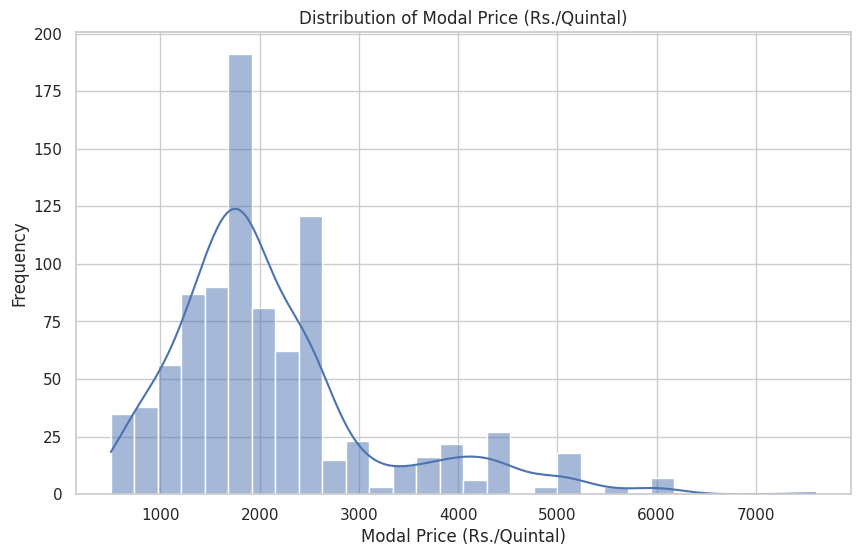

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# style
sns.set(style="whitegrid")

# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Modal Price (Rs./Quintal)'], bins=30, kde=True)
plt.title('Distribution of Modal Price (Rs./Quintal)')
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('Frequency')
plt.show()

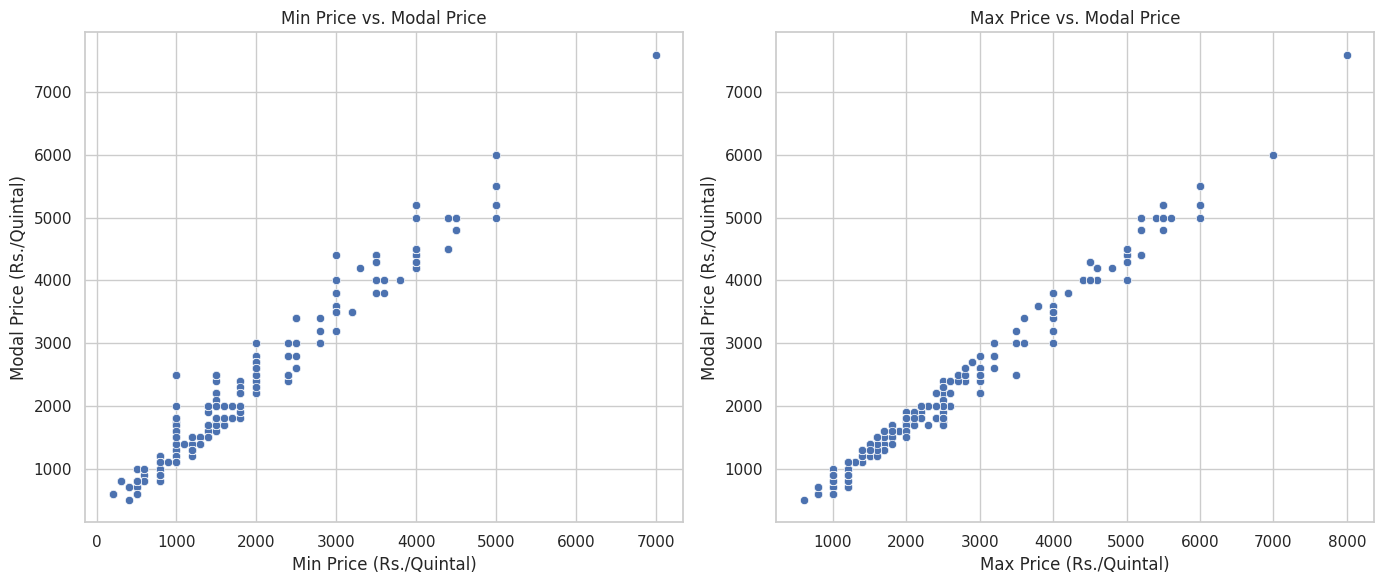

In [38]:
# Plot the realtionship between Min Price, Max Price and Modal Price
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Min Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', data=data_encoded)
plt.title('Min Price vs. Modal Price')
plt.xlabel('Min Price (Rs./Quintal)')
plt.ylabel('Modal Price (Rs./Quintal)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Max Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', data=data_encoded)
plt.title('Max Price vs. Modal Price')
plt.xlabel('Max Price (Rs./Quintal)')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.tight_layout()
plt.show()

The visualization show the distribution of `Modal Price` is right-skewed. The scatter plots indicate a positive correlation between the modal price and both the minimum and maximum prices.

In [39]:
data_encoded.describe()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Year,Month
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,1720.697168,2450.217865,2111.819172,2023.467320,6.631808
std,970.663891,1153.078926,1046.583611,0.499203,3.493186
min,200.000000,600.000000,500.000000,2023.000000,1.000000
25%,1000.000000,1700.000000,1500.000000,2023.000000,3.000000
50%,1500.000000,2200.000000,1800.000000,2023.000000,7.000000
75%,2000.000000,2800.000000,2500.000000,2024.000000,10.000000
max,7000.000000,8000.000000,7600.000000,2024.000000,12.000000


### 4. Train-Test Split

  We need to split the data into training and testing sets to evaluate out model's performance


In [41]:
from sklearn.model_selection import train_test_split

# Define X and y
X = data_encoded.drop(columns=["Modal Price (Rs./Quintal)"], axis=1)
y = data_encoded["Modal Price (Rs./Quintal)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 14), (184, 14), (734,), (184,))

### 5. Model Training

Start with Linear regresssion model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8530.325411877797
R-squared: 0.9929821569813513


### 6. Model Evaluation

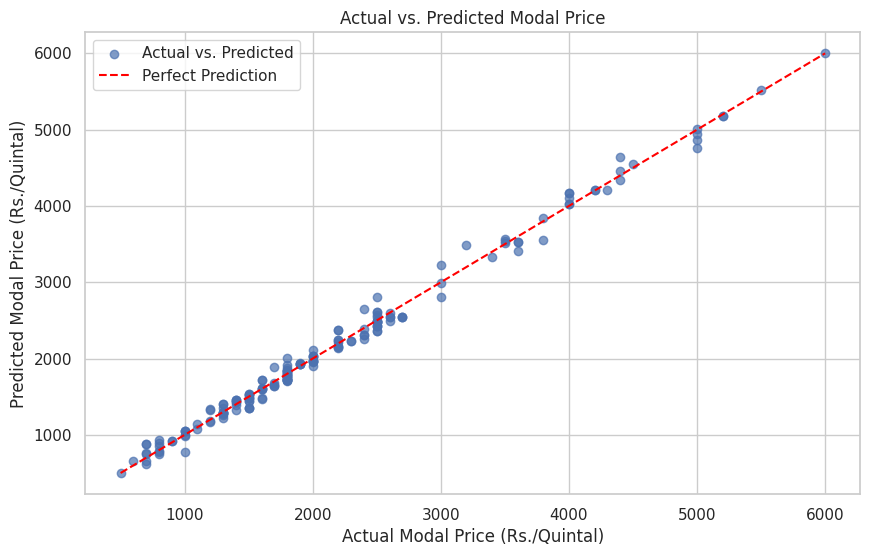

In [45]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Modal Price (Rs./Quintal)')
plt.ylabel('Predicted Modal Price (Rs./Quintal)')
plt.title('Actual vs. Predicted Modal Price')
plt.legend()
plt.show()

### 7. Model Tuning and Trying Other Algorithms

1. Decision Tree Regressor
2. Random Forest Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2  = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2  = r2_score(y_test, rf_pred)

print(f'Decision Tree - MSE: {dt_mse:.2f}, R^2: {dt_r2:.2f}')
print(f'Random Forest - MSE: {rf_mse:.2f}, R^2: {rf_r2:.2f}')

Decision Tree - MSE: 4734.20, R^2: 1.00
Random Forest - MSE: 4145.19, R^2: 1.00


### 8. Feature Importance

For models like Random Forest and Gradient Boosting, we can check the feature importance to understand which features are contributing most to the predictions

<function matplotlib.pyplot.show(close=None, block=None)>

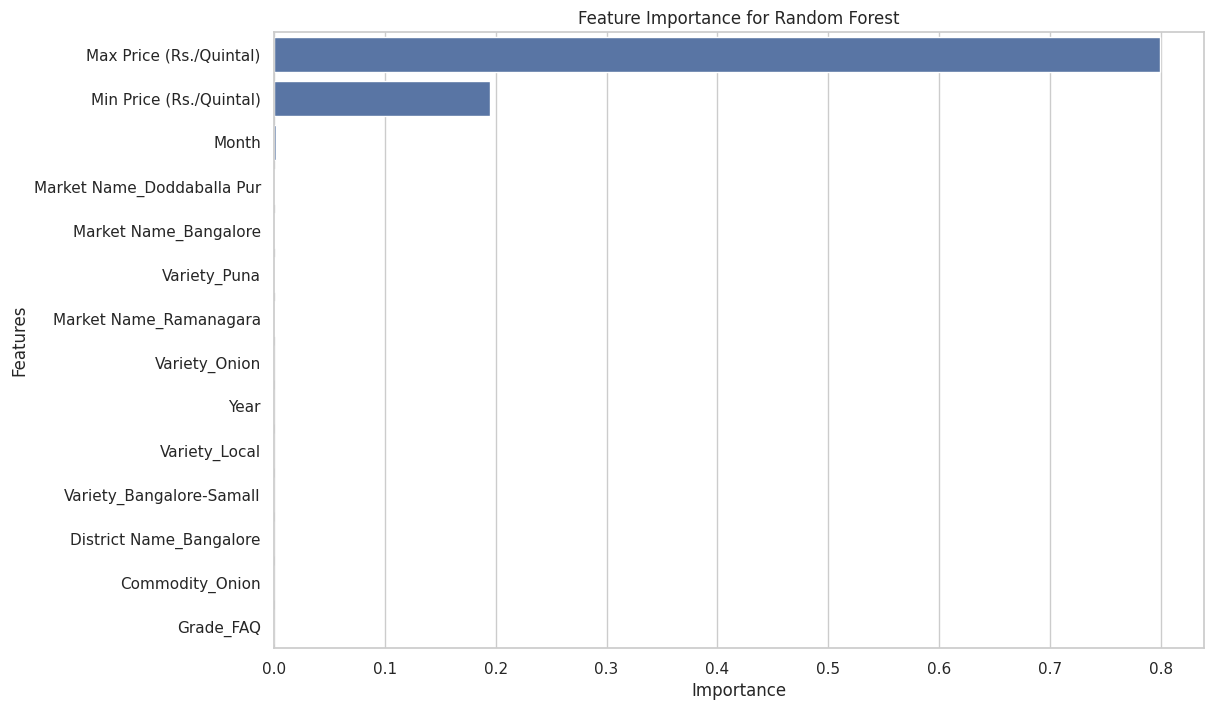

In [47]:
# Feature importance for Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index)
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show